In [9]:
%pip install scikit-learn matplotlib --quiet


Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

## Exp-1 MP Neuron


In [5]:
# MP Neuron function
def mp_neuron(x, w, threshold):
    """McCulloch-Pitts Neuron: Returns 1 if weighted sum >= threshold, else 0"""
    return 1 if np.dot(x, w) >= threshold else 0

# Perceptron class
class Perceptron:
    def __init__(self, n_inputs, lr=0.1, epochs=10):
        self.w = np.zeros(n_inputs + 1)  # weights + bias
        self.lr = lr
        self.epochs = epochs
    
    def predict(self, x):
        z = np.dot(x, self.w[1:]) + self.w[0]
        return 1 if z >= 0 else 0
    
    def fit(self, X, y):
        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                pred = self.predict(xi)
                error = target - pred
                self.w[1:] += self.lr * error * xi
                self.w[0] += self.lr * error

# Dataset (AND gate)
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

print("="*50)
print("AND GATE IMPLEMENTATION")
print("="*50)

# MP Neuron test
mp_weights = np.array([1, 1])
mp_threshold = 2
print("\nMP Neuron outputs:")
print("-"*30)
for xi, yi in zip(X, y):
    output = mp_neuron(xi, mp_weights, mp_threshold)
    print(f"Input: {xi}, Expected: {yi}, Output: {output}")

# Train Perceptron
print("\n" + "="*50)
print("PERCEPTRON TRAINING")
print("="*50)
p = Perceptron(n_inputs=2, lr=0.1, epochs=10)
p.fit(X, y)

print(f"\nLearned weights: {p.w[1:]}")
print(f"Learned bias: {p.w[0]}")

print("\nPerceptron outputs after training:")
print("-"*30)
for xi, yi in zip(X, y):
    output = p.predict(xi)
    print(f"Input: {xi}, Expected: {yi}, Output: {output}")

# Calculate accuracy
predictions = [p.predict(xi) for xi in X]
accuracy = sum([1 for pred, true in zip(predictions, y) if pred == true]) / len(y)
print(f"\nAccuracy: {accuracy * 100:.1f}%")

AND GATE IMPLEMENTATION

MP Neuron outputs:
------------------------------
Input: [0 0], Expected: 0, Output: 0
Input: [0 1], Expected: 0, Output: 0
Input: [1 0], Expected: 0, Output: 0
Input: [1 1], Expected: 1, Output: 1

PERCEPTRON TRAINING

Learned weights: [0.2 0.1]
Learned bias: -0.20000000000000004

Perceptron outputs after training:
------------------------------
Input: [0 0], Expected: 0, Output: 0
Input: [0 1], Expected: 0, Output: 0
Input: [1 0], Expected: 0, Output: 0
Input: [1 1], Expected: 1, Output: 1

Accuracy: 100.0%


## Exp-2 Sigmoid Neuron on Iris

In [8]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Sigmoid Neuron (Logistic Regression) class
class SigmoidNeuron:
    def __init__(self, lr=0.1, epochs=1000):
        self.lr = lr
        self.epochs = epochs
    
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0
        
        for epoch in range(self.epochs):
            z = np.dot(X, self.w) + self.b
            y_pred = sigmoid(z)
            error = y - y_pred
            
            # Gradient ascent (since we're maximizing likelihood)
            self.w += self.lr * np.dot(X.T, error) / len(y)
            self.b += self.lr * error.mean()
    
    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        return (sigmoid(z) >= 0.5).astype(int)
    
    def predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        return sigmoid(z)

# Load Iris dataset
print("="*60)
print("SIGMOID NEURON ON IRIS DATASET")
print("="*60)

data = load_iris()
X = data.data[:, :2]  # Use first two features for simplicity
y = (data.target == 2).astype(int)  # Iris-Virginica = 1, others = 0

print(f"\nDataset Info:")
print(f"  Total samples: {len(X)}")
print(f"  Features used: {data.feature_names[:2]}")
print(f"  Class distribution: Virginica={y.sum()}, Others={len(y)-y.sum()}")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"\nTrain/Test Split:")
print(f"  Training samples: {len(X_train)}")
print(f"  Test samples: {len(X_test)}")

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Sigmoid Neuron
print(f"\nTraining Sigmoid Neuron...")
print(f"  Learning rate: 0.1")
print(f"  Epochs: 1000")

model = SigmoidNeuron(lr=0.1, epochs=1000)
model.fit(X_train, y_train)

print(f"\nLearned Parameters:")
print(f"  Weights: {model.w}")
print(f"  Bias: {model.b:.4f}")

# Predict and evaluate
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = np.mean(y_pred_train == y_train)
test_accuracy = np.mean(y_pred_test == y_test)

print(f"\n" + "="*60)
print("RESULTS")
print("="*60)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Show some predictions
print(f"\nSample Predictions on Test Set (first 10):")
print("-"*60)
print(f"{'Actual':<10} {'Predicted':<12} {'Probability':<12}")
print("-"*60)
for i in range(min(10, len(y_test))):
    prob = model.predict_proba(X_test[i:i+1])[0]
    print(f"{y_test.iloc[i] if hasattr(y_test, 'iloc') else y_test[i]:<10} {y_pred_test[i]:<12} {prob:.4f}")

# Confusion Matrix
true_pos = np.sum((y_test == 1) & (y_pred_test == 1))
true_neg = np.sum((y_test == 0) & (y_pred_test == 0))
false_pos = np.sum((y_test == 0) & (y_pred_test == 1))
false_neg = np.sum((y_test == 1) & (y_pred_test == 0))

print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"               0        1")
print(f"Actual 0    {true_neg:4d}    {false_pos:4d}")
print(f"       1    {false_neg:4d}    {true_pos:4d}")

SIGMOID NEURON ON IRIS DATASET

Dataset Info:
  Total samples: 150
  Features used: ['sepal length (cm)', 'sepal width (cm)']
  Class distribution: Virginica=50, Others=100

Train/Test Split:
  Training samples: 105
  Test samples: 45

Training Sigmoid Neuron...
  Learning rate: 0.1
  Epochs: 1000

Learned Parameters:
  Weights: [ 2.05600745 -0.14674265]
  Bias: -1.0124

RESULTS
Training Accuracy: 80.00%
Test Accuracy: 82.22%

Sample Predictions on Test Set (first 10):
------------------------------------------------------------
Actual     Predicted    Probability 
------------------------------------------------------------
0          0            0.4253
0          0            0.1618
1          1            0.9767
0          0            0.3579
0          1            0.8076
0          0            0.0955
0          0            0.1714
1          1            0.8287
0          1            0.5394
0          0            0.2670

Confusion Matrix:
                 Predicted
           

## Exp-3 FFN in Multi-class Classification


FEEDFORWARD NEURAL NETWORK - MULTI-CLASS CLASSIFICATION

Original Training Data:
X shape: (8, 2)
Y shape: (8,)
Classes: [0 1 2]

Normalized Training Data (mean=0, std=1)

Initializing FFN:
  Input size: 2
  Hidden size: 5
  Output size: 3
  Learning rate: 0.1

Training for 5000 epochs...
Epoch 1000/5000, Loss: 0.3689
Epoch 2000/5000, Loss: 0.2500
Epoch 3000/5000, Loss: 0.2110
Epoch 4000/5000, Loss: 0.1930
Epoch 5000/5000, Loss: 0.1634

TRAINING RESULTS
Training Loss: 0.1633
Training Accuracy: 100.00%


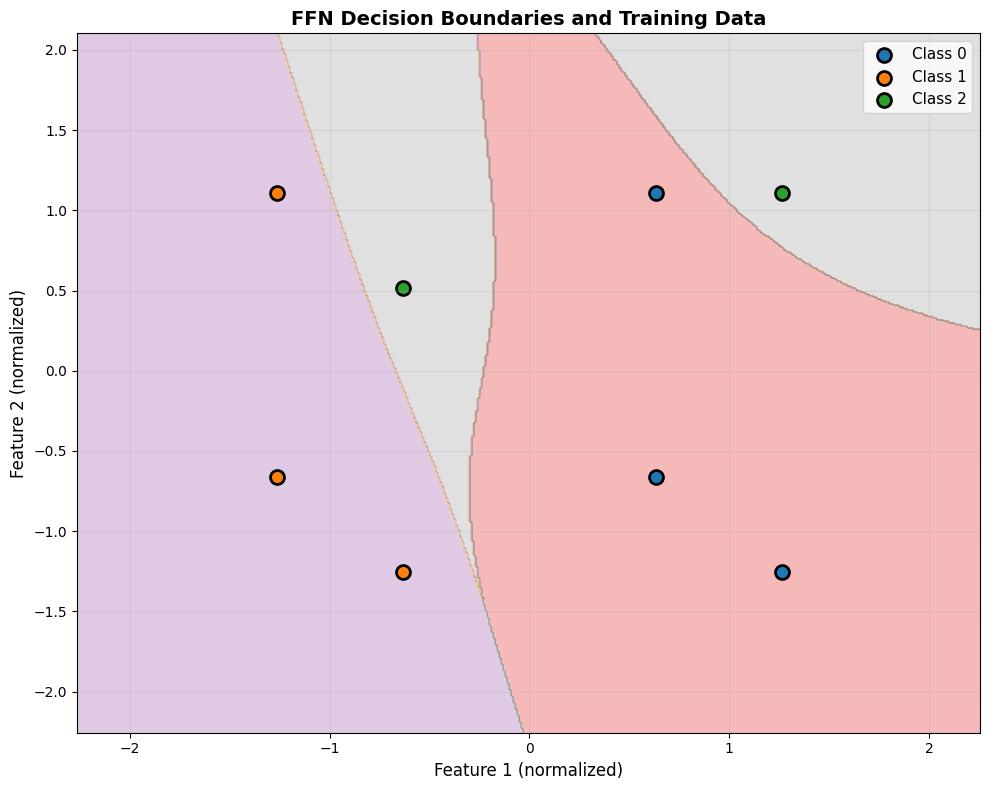


TEST DATA EVALUATION
Original test data:
[[ 0  0]
 [ 1  1]
 [-1 -1]]

Normalized test data:
[[ 0.         -0.07392213]
 [ 0.63245553  0.51745489]
 [-0.63245553 -0.66529914]]

Predictions on test data points: [0 0 1]
Actual labels: [0 2 1]

Test Loss: 0.5097
Test Accuracy: 66.67%

DETAILED TEST PREDICTIONS

Test point 1: [0 0]
  Probabilities: Class 0=0.8048, Class 1=0.0003, Class 2=0.1949
  Predicted: 0, Actual: 0, ✓

Test point 2: [1 1]
  Probabilities: Class 0=0.7070, Class 1=0.0000, Class 2=0.2929
  Predicted: 0, Actual: 2, ✗

Test point 3: [-1 -1]
  Probabilities: Class 0=0.0113, Class 1=0.9194, Class 2=0.0693
  Predicted: 1, Actual: 1, ✓


In [5]:
# Feedforward Neural Network class
class FFN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.5
        self.b2 = np.zeros((1, output_size))
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
    
    def sigmoid_derivative(self, z):
        return z * (1 - z)
    
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2
    
    def cross_entropy(self, y_true, y_pred):
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[np.arange(m), np.argmax(y_true, axis=1)] + 1e-10)
        return np.sum(log_likelihood) / m
    
    def backward(self, X, y_true, y_pred):
        m = X.shape[0]
        
        # Output layer gradients
        dz2 = y_pred - y_true
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # Hidden layer gradients
        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # Update weights and biases
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def train(self, X, y, epochs=1000):
        # Convert labels to one-hot encoding
        y_onehot = np.zeros((y.shape[0], self.output_size))
        y_onehot[np.arange(y.shape[0]), y] = 1
        
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            
            # Backward pass
            self.backward(X, y_onehot, y_pred)
            
            # Print loss every 1000 epochs
            if (epoch + 1) % 1000 == 0:
                loss = self.cross_entropy(y_onehot, y_pred)
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")
    
    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)


# Training data: 3 classes, 2 features
x_train = np.array([
    [1, 2],
    [1, -1],
    [-1, -2],
    [-2, -1],
    [2, 2],
    [-1, 1],
    [-2, 2],
    [2, -2]
])
y_train = np.array([0, 0, 1, 1, 2, 2, 1, 0])

print("="*60)
print("FEEDFORWARD NEURAL NETWORK - MULTI-CLASS CLASSIFICATION")
print("="*60)
print(f"\nOriginal Training Data:")
print(f"X shape: {x_train.shape}")
print(f"Y shape: {y_train.shape}")
print(f"Classes: {np.unique(y_train)}")

# Store mean and std for later use on test data
x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)

# Normalize features
x_train = (x_train - x_mean) / x_std

print(f"\nNormalized Training Data (mean=0, std=1)")

# Create and train FFN
print(f"\nInitializing FFN:")
print(f"  Input size: 2")
print(f"  Hidden size: 5")
print(f"  Output size: 3")
print(f"  Learning rate: 0.1")
print(f"\nTraining for 5000 epochs...")

ffn = FFN(input_size=2, hidden_size=5, output_size=3, learning_rate=0.1)
ffn.train(x_train, y_train, epochs=5000)

# Calculate and print accuracy and loss on training data
y_train_onehot = np.zeros((y_train.shape[0], ffn.output_size))
y_train_onehot[np.arange(y_train.shape[0]), y_train] = 1
train_predictions_proba = ffn.forward(x_train)
train_loss = ffn.cross_entropy(y_train_onehot, train_predictions_proba)
train_predictions = np.argmax(train_predictions_proba, axis=1)
train_accuracy = np.mean(train_predictions == y_train)

print(f"\n" + "="*60)
print("TRAINING RESULTS")
print("="*60)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Create mesh grid for decision boundary visualization
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_hstack = np.c_[xx.ravel(), yy.ravel()]
Z = ffn.predict(grid_hstack)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)

# Plot training data points with labels
for class_value in np.unique(y_train):
    plt.scatter(x_train[y_train==class_value, 0],
                x_train[y_train==class_value, 1], 
                label=f"Class {class_value}",
                s=100, edgecolors='black', linewidths=2)

plt.title("FFN Decision Boundaries and Training Data", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1 (normalized)", fontsize=12)
plt.ylabel("Feature 2 (normalized)", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Predictions on test data points
x_test = np.array([[0, 0], [1, 1], [-1, -1]])
y_test = np.array([0, 2, 1])  # Define true labels for the test points

print(f"\n" + "="*60)
print("TEST DATA EVALUATION")
print("="*60)
print(f"Original test data:")
print(x_test)

# Normalize test data using the mean and std of the training data
x_test_normalized = (x_test - x_mean) / x_std

print(f"\nNormalized test data:")
print(x_test_normalized)

# Calculate and print predictions
predictions = ffn.predict(x_test_normalized)
print(f"\nPredictions on test data points: {predictions}")
print(f"Actual labels: {y_test}")

# Calculate and print accuracy and loss on test data
y_test_onehot = np.zeros((y_test.shape[0], ffn.output_size))
y_test_onehot[np.arange(y_test.shape[0]), y_test] = 1
test_predictions_proba = ffn.forward(x_test_normalized)
test_loss = ffn.cross_entropy(y_test_onehot, test_predictions_proba)
test_accuracy = np.mean(predictions == y_test)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Show prediction probabilities
print(f"\n" + "="*60)
print("DETAILED TEST PREDICTIONS")
print("="*60)
for i, (pred, true) in enumerate(zip(predictions, y_test)):
    probs = test_predictions_proba[i]
    print(f"\nTest point {i+1}: {x_test[i]}")
    print(f"  Probabilities: Class 0={probs[0]:.4f}, Class 1={probs[1]:.4f}, Class 2={probs[2]:.4f}")
    print(f"  Predicted: {pred}, Actual: {true}, {'✓' if pred == true else '✗'}")
